> For this problem, I will be using the <a href='https://en.wikipedia.org/wiki/Bailey%E2%80%93Borwein%E2%80%93Plouffe_formula'>BBP</a> formula to calculate $\pi$ to 100 digits. 

> The Bailey–Borwein–Plouffe (BBP) formula is as follows:

> $$ \pi = \sum_{n=0}^\infty \frac{1}{16^n} \left( \frac{4}{8n+1} - \frac{2}{8n+4} - \frac{1}{8n+5} - \frac{1}{8n+6} \right) $$

> However, there is a subtlety associated with including this number of digits that we need to address. This subtlety is that maximum number of digits that can represented on a copmuter according to the <a href='https://en.wikipedia.org/wiki/Decimal128_floating-point_format'> decimal128</a> floating point format is 34 digits. To get around this limitation, I will be using the <a href='https://mpmath.org/'>mpmath</a> library which will allow us to accurately represet this irrational number accurately up to a 100 digits. 

> First, I will implement the BBP formula using a serial program. Then I will implement two parallel version of it. The first version will make use of the multiprocessing library and will run the program locally on the 8 cores available on my computer. The second parallel version will be implement using OPENMPI to run the implement BBP on eight cores as well. The performance in each case will be compared.

### Serial BBP implementation

In [ ]:
# The serial version of BPP is implemented in the file named serial-pi.py
# Assuming you have all the dependencies installed 
# you can run the included python script as follows:
!python serial-pi.py

Computed pi value is: 
3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679
Known pi value is: 
3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679
The number of different digits is: 0
Total time taken: 17.0354 seconds


In [ ]:
# The first parallel version implemented through the multiprocessing library 
# is in multiprocessing-pi.py
# Assuming you have all the dependencies installed 
# you can run the included python script as follows:
!python multiprocessing-pi.py

Computed pi value is: 
3.14159265358979
Known pi value is: 
3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679
The number of different digits is: 0
Total time taken: 6.2711 seconds


In [ ]:
# The second parallel version implemented through OPENMPI is in mpi-pi.py
# Assuming you have all the dependencies installed 
# you can run the included python script as follows:
!mpiexec -np 8 python mpi-pi.py

Computed pi value is: 
3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679
Known pi value is: 
3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679
The number of different digits is: 0
Total time taken: 3.8117 seconds


> As we can see both the parallel version ar much faster than the serial version. The multiprocessing version is about 3 times faster than the serial implementation while the OPENMPI version is about 4 times faster than the serial version. This also goes to show how powerful MPI is.

> I did a quick benchmark of the performance improvent as the number of cores increased using OPENMPI and the results are below:

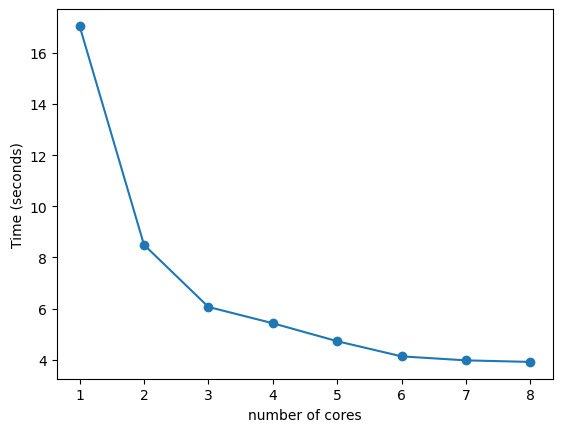

In [ ]:
from matplotlib import pyplot as plt
run_times = [17.0550,8.4965,6.0658,5.4285,4.7260,4.1331,3.9767,3.9160]
cores = [1,2,3,4,5,6,7,8]
plt.plot(cores,run_times,'-o');
plt.xlabel('number of cores');
plt.ylabel('Time (seconds)');